In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Exercise 1: t-SNE 

In [2]:
# load data, take the first 1000
X = np.load("data/ds_colorferet_emb.npy") [:1000]
y_gender = np.load("data/ds_colorferet_gender.npy", allow_pickle=True)[:1000]
y_age = np.load("data/ds_colorferet_age.npy", allow_pickle=True)[:1000]
y_ethnicity = np.load("data/ds_colorferet_ethnicity.npy", allow_pickle=True)[:1000]

In [3]:
#filter for attribute
y_att = y_gender

In [4]:
#compute tnse with 2 components and fit on the data
X_red = TSNE(n_components=2).fit_transform(X)

In [5]:
X

array([[ 4.13269736e-02, -9.39471275e-02, -1.16253840e-02, ...,
         2.36692652e-02, -1.40740944e-04, -1.13831826e-01],
       [ 4.46810871e-02, -1.53768763e-01, -1.05139893e-02, ...,
         2.23247912e-02, -5.00132740e-02, -7.71622881e-02],
       [ 1.00932546e-01, -3.11927460e-02,  3.71218920e-02, ...,
         5.97598515e-02, -4.02809232e-02, -7.90135413e-02],
       ...,
       [ 4.93309945e-02,  5.02366386e-02,  6.85632974e-02, ...,
        -3.18284496e-03, -2.27799743e-01, -1.09174855e-01],
       [-3.61716300e-02, -6.68519810e-02, -1.46531546e-02, ...,
        -6.68698773e-02,  2.14213300e-02, -9.77538060e-04],
       [-9.38845351e-02, -6.38795737e-03, -5.64200841e-02, ...,
        -6.71737418e-02, -2.06193235e-02, -8.10466781e-02]])

In [6]:
X_red

array([[ 1.9977263, 16.88126  ],
       [ 2.2200701, 16.705635 ],
       [ 2.5956798, 16.353962 ],
       ...,
       [ 3.9645426,  1.1654707],
       [12.092121 ,  8.440948 ],
       [12.281816 ,  8.351066 ]], dtype=float32)

In [7]:
#save levels of the attributes
attributes = np.unique(y_att)

Female (240,)
Male (760,)


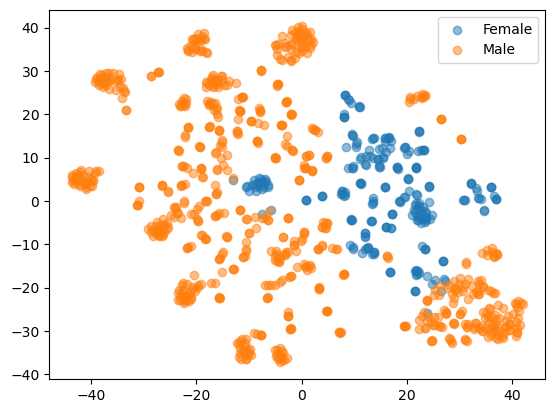

In [8]:
plt.figure()
for att_cur in attributes: #different colour for male and female
    idx = y_att==att_cur #keep tracks of who's male and who's female
    print(att_cur, X[idx,0].shape)#print number of males and females
    plt.scatter(X_red[idx,0], X_red[idx,1], label=str(att_cur), alpha=0.5)#plot tsne1 and tsne2, specify label for legend and 
    #alpha for the transparent dotts
plt.legend()
plt.show()

Female (240,)
Male (760,)


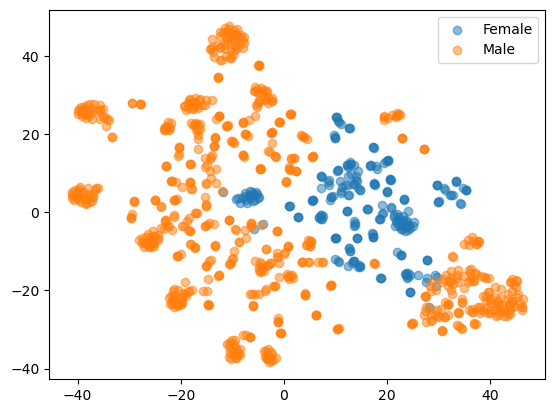

20 (173,)
21 (85,)
30 (298,)
31 (167,)
33 (44,)
40 (98,)
41 (63,)
50 (48,)
60 (13,)
61 (11,)


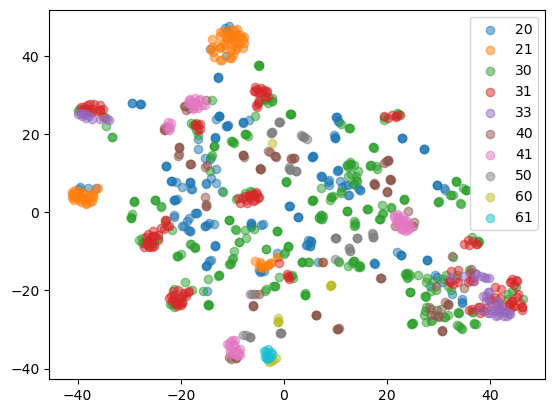

Asian (389,)
Black (79,)
Other (39,)
White (493,)


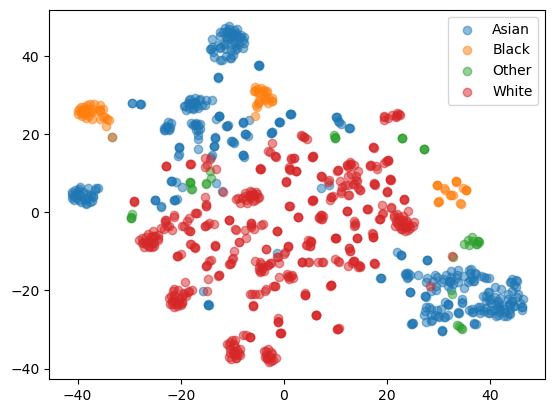

In [9]:
# do the same for the other attributes

y_attributes = [y_gender, y_age, y_ethnicity]

# apply TSNE 
X_red = TSNE(n_components=2).fit_transform(X)

for y in y_attributes:
    attributes = np.unique(y)
    # plot TSNE
    plt.figure()
    # X_0, X_1 = X[0,:], X[1,:]
    for att_cur in attributes: #different colour for male and female
        idx = y==att_cur 
        print(att_cur, X[idx,0].shape)#print number of males and females
        plt.scatter(X_red[idx,0], X_red[idx,1], label=str(att_cur), alpha=0.5)
    plt.legend()
    plt.show()


# Exercise 2: Logistic Regression

In [56]:
X = np.load("data/ds_colorferet_emb.npy") 
y_gender = np.load("data/ds_colorferet_gender.npy", allow_pickle=True)
x = X
y = y_gender

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
logistic = LogisticRegression(max_iter=1000)
distributions = dict(C=[0.001, 0.01, 0.1, 1, 10, 100, 1000], penalty=['l1', 'l2', 'elasticnet', None])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(x_train, y_train)
search.best_params_

C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\s

{'penalty': 'l2', 'C': 10}

In [12]:
predictions = search.predict(x_test)
print(accuracy_score(y_test, predictions))

0.9818181818181818


In [13]:
print(precision_score(y_test, predictions, pos_label='Male'))
print(precision_score(y_test, predictions, pos_label='Female'))

0.9847328244274809
0.9705882352941176


In [15]:
print(recall_score(y_test, predictions, pos_label='Male'))
print(recall_score(y_test, predictions, pos_label='Female'))

0.9923076923076923
0.9428571428571428


# Exercise 3

In [33]:
X = np.load("data/ds_colorferet_emb.npy")

In [34]:
data_pca = PCA()
data_pca.fit_transform(X)

array([[-8.44957059e-02,  1.51127689e-01,  2.08145043e-01, ...,
         5.32944817e-05, -9.04663560e-05, -3.17053236e-04],
       [-8.82982780e-02,  1.75284371e-01,  1.09588702e-01, ...,
        -5.72466130e-06, -2.22904312e-04, -5.05242519e-05],
       [-1.16155535e-01,  2.06052047e-01, -6.87031872e-03, ...,
         1.64407202e-04, -5.25719363e-05,  6.94210798e-05],
       ...,
       [ 9.46376863e-03, -6.20974244e-02,  1.30820031e-01, ...,
        -1.57505062e-04,  1.06898644e-04, -1.56386902e-04],
       [-6.80226348e-03,  1.41149954e-01,  1.55584039e-01, ...,
        -3.41835162e-04, -2.55515452e-04, -1.33397489e-04],
       [ 9.65163550e-02,  3.34079960e-02,  7.89844517e-02, ...,
        -1.50271325e-04,  2.60066923e-04, -1.40891263e-04]])

Let's see how mach variance is explained by each PC

In [35]:
data_pca.explained_variance_ratio_

array([4.97278707e-02, 3.61614105e-02, 3.49063464e-02, 3.35912546e-02,
       3.29974566e-02, 3.11387308e-02, 2.93216359e-02, 2.80978321e-02,
       2.72086839e-02, 2.59249429e-02, 2.47885895e-02, 2.38650540e-02,
       2.34779258e-02, 2.18665445e-02, 2.14825912e-02, 2.11311764e-02,
       2.05830168e-02, 1.99146747e-02, 1.95332698e-02, 1.88628027e-02,
       1.80669980e-02, 1.78119389e-02, 1.72372561e-02, 1.70918792e-02,
       1.68056970e-02, 1.67761088e-02, 1.60233967e-02, 1.57460663e-02,
       1.51694054e-02, 1.47307101e-02, 1.42546900e-02, 1.38499613e-02,
       1.37003407e-02, 1.31780403e-02, 1.27830624e-02, 1.26157082e-02,
       1.24721707e-02, 1.20960640e-02, 1.17619066e-02, 1.13125817e-02,
       1.12672973e-02, 1.08379339e-02, 1.08029131e-02, 1.06992345e-02,
       1.00843232e-02, 9.64532690e-03, 9.38175534e-03, 8.92649513e-03,
       8.59180986e-03, 8.32614418e-03, 7.86593705e-03, 7.73623726e-03,
       7.36545795e-03, 6.86340019e-03, 6.64373720e-03, 5.96460431e-03,
      

Now we can get the cumulative sum of the explained variance ratio to see when the 50%, 90% and 95% is reached

In [36]:
cumulative_variance = np.cumsum(data_pca.explained_variance_ratio_) 
print(cumulative_variance)

[0.04972787 0.08588928 0.12079563 0.15438688 0.18738434 0.21852307
 0.24784471 0.27594254 0.30315122 0.32907616 0.35386475 0.37772981
 0.40120773 0.42307428 0.44455687 0.46568805 0.48627106 0.50618574
 0.52571901 0.54458181 0.56264881 0.58046075 0.597698   0.61478988
 0.63159558 0.64837169 0.66439508 0.68014115 0.69531056 0.71004127
 0.72429596 0.73814592 0.75184626 0.7650243  0.77780736 0.79042307
 0.80289524 0.8149913  0.82675321 0.83806579 0.84933309 0.86017102
 0.87097394 0.88167317 0.89175749 0.90140282 0.91078458 0.91971107
 0.92830288 0.93662903 0.94449496 0.9522312  0.95959666 0.96646006
 0.9731038  0.9790684  0.98417338 0.98837834 0.99246165 0.99561996
 0.99763049 0.99929135 0.99957144 0.99974361 0.9998397  0.99990052
 0.99993203 0.99994886 0.99996163 0.9999701  0.99997838 0.99998272
 0.99998588 0.99998791 0.99998965 0.99999102 0.99999221 0.99999313
 0.99999393 0.9999946  0.99999505 0.99999547 0.99999584 0.99999618
 0.99999649 0.99999675 0.99999699 0.9999972  0.99999739 0.9999

In [45]:
np.where(cumulative_variance>=0.5)[0][0]

17

In [46]:
np.where(cumulative_variance>=0.9)[0][0]

45

In [47]:
np.where(cumulative_variance>=0.95)[0][0]

51

17 dimensions explain 50% of the data variance. 45 dimensions explain 90% of the data variance. 
51 dimensions explain 95% of the data variance. 


In [70]:
X = np.load("data/ds_colorferet_emb.npy") [:1000]
y_gender = np.load("data/ds_colorferet_gender.npy", allow_pickle=True)[:1000]
data_pca = PCA(n_components=100)
new_X = data_pca.fit_transform(X)

x = new_X
y = y_gender

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [71]:
logistic = LogisticRegression(max_iter=2000)
distributions = dict(C=[0.001, 0.01, 0.1, 1, 10, 100, 1000], penalty=['l1', 'l2', 'elasticnet', None])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(x_train, y_train)
search.best_params_

C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cbiagi\AppData\Local\anaconda3\lib\s

{'penalty': 'l2', 'C': 10}

In [73]:
logistic = LogisticRegression(penalty = 'l2', C= 10)
logistic = logistic.fit(x_train, y_train)

In [74]:
logistic.coef_

array([[ 3.73751472e+00,  6.93254020e+00, -3.65993296e-01,
         7.78704914e+00,  6.01927197e+00, -7.28776541e+00,
         6.57936749e+00, -8.05420175e-01, -1.22792951e+00,
        -9.14981358e-01, -3.06015878e+00,  3.43588691e-01,
        -2.67056439e+00,  2.64331507e-01,  1.63469402e+00,
         2.33151413e-01,  3.62305885e+00,  4.74417459e+00,
         7.10576493e+00, -2.25804029e+00,  3.46554887e+00,
         1.25318063e+00, -2.10500247e+00,  6.58168787e-01,
         3.66612986e+00, -1.72588944e+00,  7.80555596e-01,
        -1.55078659e-01,  2.32393825e+00, -4.87643133e-01,
         8.75370933e-01,  6.98737647e-01, -5.70393953e-01,
        -2.06609971e+00, -1.15941237e+00, -1.71596624e+00,
         2.40866293e+00, -1.18754960e+00, -1.35380287e-01,
         1.52839426e+00,  6.25645573e-01,  1.17376534e+00,
         8.98369628e-01, -7.69519997e-01,  5.18971732e-01,
        -1.19584798e+00,  7.74871019e-01,  6.17435199e-01,
        -4.92114756e-01,  2.96626118e-01, -7.56757749e-0

Simplified, the model weights of the logistic regression model can be interpreted as the importance of a feature for the classification task. While the first dimensions of the transformed data explain the highest amount of data variations, the latter dimensions explain mostly noise. Therefore, the feature weights for the latter dimensions are close to zero since these contain less useful information for the classification task. 